In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [26]:
df_machine = pd.read_pickle('df_machine.pkl')

In [27]:
df_machine

,HORAS DE CONTRATO,Categoría,Número de hijos,Sexo,Supervisora/Coordinador,Sección,IT/AT,Horas contratadas,TIPO DE BAJA,Evaluación,Supervisor/a,CATEGORIA,SECCIÓN,TIENDA/SECCION INICIAL,SECCIÓN2,TIENDA/SECCION FINAL2,QUIEN CAUSO BAJA?
ID,,,,,,,,,,,,,,,,,
0877N,1,3,2,1,2,1,1.0,1.0,1.0,5.0,9.0,1.0,3.0,91.0,1.0,1.0,1.0
8040C,1,3,2,1,2,1,1.0,1.0,2.0,4.0,4.0,1.0,3.0,91.0,2.0,68.0,3.0
3606B,1,3,3,1,2,1,1.0,1.0,2.0,1.0,4.0,1.0,3.0,91.0,1.0,1.0,1.0
5220H,1,3,2,1,2,1,1.0,1.0,1.0,4.0,4.0,1.0,3.0,91.0,1.0,1.0,1.0
0895V,1,3,2,1,2,1,1.0,1.0,2.0,1.0,14.0,1.0,3.0,91.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5944D,6,3,7,1,26,1,1.0,3.0,2.0,1.0,8.0,1.0,3.0,56.0,1.0,1.0,1.0
7733W,2,3,7,1,26,1,1.0,2.0,2.0,4.0,8.0,1.0,3.0,59.0,2.0,13.0,2.0
3466E,2,3,7,1,26,1,1.0,2.0,2.0,2.0,8.0,1.0,3.0,61.0,2.0,10.0,2.0


In [28]:
def elbow_method(df):
    """
    This function calculate the sum of squared distances for each k value and plots graph
    :arg:
        df: dataframe with all the data.
    :returns:
        The function does not have a return. It saves the plot inside the plots folder.
    """
    k_values = list(range(2, 11))
    sse = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        sse.append(kmeans.inertia_)
        
        #Create the line chart
    fig = go.Figure(data=go.Scatter(x=list(k_values), y=sse, mode='lines+markers'))
    fig.update_layout(
        title='Elbow Method',
        xaxis=dict(title='Number of Clusters (k)'),
        yaxis=dict(title='Sum of Squared Distances'),
        showlegend=False,
        template='plotly_white'
    )
    
    fig.show()

In [29]:
elbow_method(df_machine)

C:\Users\sicil\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sicil\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sicil\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sicil\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sicil\miniconda3\envs\ironhack\lib\site-package

In [30]:
def silhouette_plot(df):
    """
    Generate an interactive line chart of Silhouette Coefficient vs. Number of Clusters using Plotly.

    :Args:
    df: (pandas DataFrame): The input data.
    """
    k_values = list(range(2, 11))
    silhouette_scores = []

    for k in k_values:
        # Perform clustering with K clusters
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(df)

        # Calculate the Silhouette Coefficient for the clustering result
        silhouette_coefficient = silhouette_score(df, cluster_labels)
        silhouette_scores.append(silhouette_coefficient)

    # Create the line chart
    fig = go.Figure(data=go.Scatter(x=k_values, y=silhouette_scores, mode='lines+markers'))
    fig.update_layout(
        title='Silhouette Coefficient vs. Number of Clusters',
        xaxis=dict(title='Number of Clusters (k)'),
        yaxis=dict(title='Silhouette Coefficient'),
        showlegend=False,
        template='plotly_white'
    )

    # Display the chart
    fig.show()

In [31]:
silhouette_plot(df_machine)

C:\Users\sicil\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sicil\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sicil\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sicil\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sicil\miniconda3\envs\ironhack\lib\site-package

In [32]:
def davies_boulding_plot(df):
    """
    Generate an interactive line chart of Davies-Bouldin Index vs. Number of Clusters using Plotly.
    :Args:
    df (pandas DataFrame): The input data.
    """
    
    k_values = list(range(2, 11))
    davies_bouldin_scores = []

    for k in k_values:
        # Perform clustering with K clusters
        kmeans = KMeans(n_clusters=k)
        cluster_labels = kmeans.fit_predict(df)

#Calculate the Davies-Bouldin Index for the clustering result
        davies_bouldin_index = davies_bouldin_score(df, cluster_labels)
        davies_bouldin_scores.append(davies_bouldin_index)

    # Create the line chart
    fig = go.Figure(data=go.Scatter(x=list(k_values), y=davies_bouldin_scores, mode='lines+markers'))
    fig.update_layout(
        title='Davies-Bouldin Index vs. Number of Clusters',
        xaxis=dict(title='Number of Clusters (K)'),
        yaxis=dict(title='Davies-Bouldin Index'),
        showlegend=False,
        template='plotly_white'
    )
    
    fig.show()

In [33]:
davies_boulding_plot(df_machine)

C:\Users\sicil\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sicil\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sicil\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sicil\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\sicil\miniconda3\envs\ironhack\lib\site-package

In [42]:
def kmeans_plot_blobs(n_samples=571, centers=5, cluster_std=0.60, random_state=0):

    X, y_true = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)

    # fit the k-means clustering model
    kmeans = KMeans(n_clusters=centers)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)

    # get the coordinates of the centroids
    centroids = kmeans.clustercenters

    # create a dictionary that maps each centroid to its coordinates
    centroid_dict = {i: centroid for i, centroid in enumerate(centroids)}

    # create a dictionary that maps each data point to its cluster
    cluster_dict = {i: cluster for i, cluster in enumerate(y_kmeans)}

    fig = go.Figure()

    # color each data point according to its cluster
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'pink', 'yellow', 'brown', 'grey', 'black']
    for cluster in np.unique(list(cluster_dict.values())):
        indices = [i for i, x in enumerate(cluster_dict.values()) if x == cluster]
        fig.add_trace(go.Scatter(
            x=X[indices, 0], 
            y=X[indices, 1], 
            mode='markers', 
            marker=dict(color=colors[cluster]), 
            name=f'Cluster {cluster + 1}'
        ))

    # Add centroids
    centroid_x = [centroid_dict[k][0] for k in centroid_dict.keys()]
    centroid_y = [centroid_dict[k][1] for k in centroid_dict.keys()]
    fig.add_trace(go.Scatter(
        x=centroid_x, 
        y=centroid_y, 
        mode='markers', 
        marker=dict(color='black', size=10), 
        name='Centroids'
    ))

    # Update layout
    fig.update_layout(
        title="K-Means Clustering",
        legend_title="Legend"
    )
    fig.show()

In [45]:
def kmeans_plot_blobs(n_samples=571, centers=5, cluster_std=0.60, random_state=0):

SyntaxError: incomplete input (2356404207.py, line 1)

C:\Users\sicil\miniconda3\envs\ironhack\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



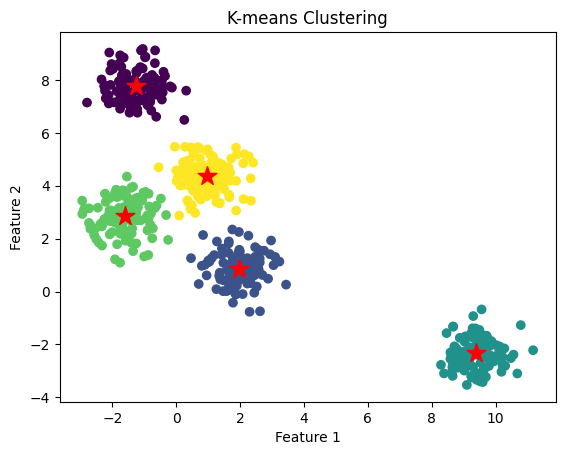

In [41]:
def kmeans_plot_blobs(n_samples=571, centers=5, cluster_std=0.60, random_state=0):
    X, y_true = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=random_state)
    
    kmeans = KMeans(n_clusters=centers)
    kmeans.fit(X)
    y_pred = kmeans.predict(X)
    
    centroids = kmeans.cluster_centers_
    
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker='*', c='red')
    plt.title("K-means Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Generar y visualizar los datos de ejemplo con k-means clustering
kmeans_plot_blobs(n_samples=571, centers=5, cluster_std=0.60, random_state=0)